# Hypothesis prioritization (ICE, ICE), A-B testing

# Project Description 
The project consists of two blocks:
1. Prioritization of hypotheses
2. A-B testing

# Goal
The goal of the first block is to specify a list of the most priority hypotheses according to two methods - ICE, ICE.
The second block is the analysis of the results of the A-B test

# Data Description
The first block presents data with a list of hypotheses and an estimate of parameters for calculating ICE, ICE indicators
In the second block, the data is presented in two sets: information on orders (orders) and information on visitors (visitors).

# Project plan
In the first block, it is necessary to apply two frameworks to identify the most priority hypotheses.
In the second block , it is necessary:
- to carry out preliminary data processing (checking for duplicates, omissions, data formats, abnormal values, possible data errors),
- to prepare intermediate dataframes for analyzing the results of the A-B test, namely: dataframes with cumulative indicators of the parameters under study (vyrka, number of orders, average receipt, number of visitors), to determine 99 and 95 percentiles in the context of the studied parameters.
- - on the basis of intermediate dataframes, to determine the statistical significance of the differences of the studied parameters in groups A and B for "raw" and "purified" data
- formulate the general conclusion of the analysis

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go


## Prioritization of hypotheses

In [2]:
##opening the data file
hypotheses = pd.read_csv(r'C:\Users\MacBook\Downloads\hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
#let's take a look at the data
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### ICE framework

In [5]:
#Add the ICE column and sort it in descending order
hypotheses['ICE'] = round((hypotheses['Impact']*hypotheses['Confidence']) / hypotheses['Efforts'],2)
hypotheses[['Hypothesis','ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### RICE framework

In [6]:
#Add the ICE column and sort it in descending order
hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']) / hypotheses['Efforts']
hypotheses[['Hypothesis','RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Output:** 
- **TOP 3 priority hypotheses for the ICE framework:** 
    - Launch a promotion that gives a discount on the product on the birthday,
- Add two new channels to attract traffic, which will attract 30% more users,
    - Add a subscription form to all the main pages to collect a customer base for email newsletters.
- **- **TOP 3 priority hypotheses for the RICE framework:** 
    - Add a subscription form to all the main pages to collect a customer base for email newsletters, 
    - Add product recommendation blocks to the online store's website to increase conversion and average order receipt,
- Add two new traffic channels, which will attract 30% more users

## Analysis of A-B testing results

In [7]:
#let's read the order file
orders = pd.read_csv(r'C:\Users\MacBook\Downloads\orders.csv')

# let's take a look at the data
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#change the date format
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
#let's read the file with the number of visitors
visitors = pd.read_csv(r'C:\Users\MacBook\Downloads\visitors.csv')
# let's take a look at the data
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
#change the date format
visitors['date'] = pd.to_datetime(visitors['date'])

The files have been read. There are two sets of data: a dataframe with data on revenue, transaction and date, as well as a dataframe with the total number of visitors by day and group. There are no gaps in the data, duplicates too. Let's take a closer look at the data.

### Data preprocessing

In [13]:
#Let's look at the quantitative signs in more detail. We see a big difference between the minimum and maximum value.
orders['revenue'].describe().apply("{0:.2f}".format)

count       1197.00
mean        8348.01
std        39191.13
min           50.00
25%         1220.00
50%         2978.00
75%         8290.00
max      1294500.00
Name: revenue, dtype: object

In [14]:
#99% of the values are below the level of 58233.2. Let's remove outliers at the hypothesis testing stage
np.percentile(orders['revenue'],[1, 5, 90,95,99,100])

array([1.00000e+02, 3.00000e+02, 1.81680e+04, 2.80000e+04, 5.82332e+04,
       1.29450e+06])

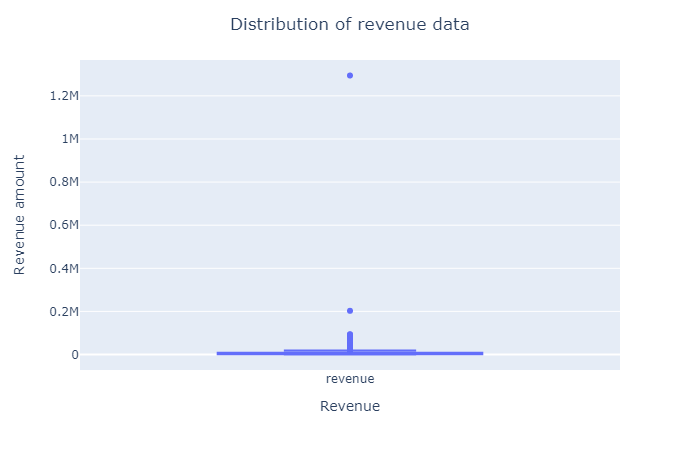

In [15]:
#The median value is 2.9 thousand. The main range is from 50 to 19 thousand. There are outliers that clearly affect the result of the analysis
fig = px.box(orders['revenue'])
fig.update_layout(title='Distribution of revenue data', title_x=0.5)
fig.update_yaxes(title_text='Revenue amount')
fig.update_xaxes(title_text='Revenue')

fig.show(renderer="png", width=700, height=450, scale=None)

In [16]:
#let's look at the study period
min_date = orders['date'].min().date()
max_date = orders['date'].max().date()
print(f"The initial date of the study {min_date}, end date of the study: {max_date}. Total duration of the test: {(max_date - min_date).days + 1} days")

The initial date of the study 2019-08-01, end date of the study: 2019-08-31. Total duration of the test: 31 days


In [17]:
#let's break down the number of users into groups
print('The ratio of groups A and B by the number of users as a percentage of the total number:')
pd.DataFrame(orders.groupby('group')['visitorId'].count()/orders['visitorId'].count())['visitorId'].map("{:,.2%}".format)

The ratio of groups A and B by the number of users as a percentage of the total number:


group
A    46.53%
B    53.47%
Name: visitorId, dtype: object

In [18]:
#Also look at the breakdown of revenue by user groups
print('The ratio of groups A and B in terms of revenue as a percentage of the total:')
pd.DataFrame(orders.groupby('group')['revenue'].sum()/orders['revenue'].sum())['revenue'].map("{:,.2%}".format)

The ratio of groups A and B in terms of revenue as a percentage of the total:


group
A    40.88%
B    59.12%
Name: revenue, dtype: object

Group A is represented less, but not significantly - 40% versus 59% for group B.

In [19]:
#let's check if there are visitors who are represented in both groups. There are 58 of them. 
#We will remove them at the hypothesis testing stage when dirty and cleaned data will be compared
temp = orders.groupby('visitorId', as_index = False)['group'].nunique()
to_del = temp[temp['group']>1]['visitorId']
len(to_del)

58

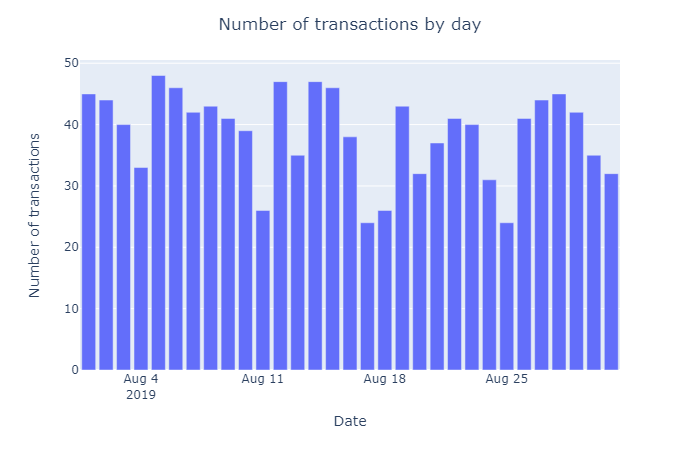

In [20]:
#Let's look at the distribution of the number of transactions by day.
df_temp = orders.groupby('date', as_index=False)['transactionId'].count()
fig = px.bar(df_temp, x='date', y='transactionId')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of transactions')
fig.update_layout(title='Number of transactions by day', title_x=0.5)
fig.show(renderer="png", width=700, height=450, scale=None)

There is a dependence of the number of orders on the day of the week. On weekends, especially on Sunday, the number of orders is sharply reduced. The remaining days of the week have approximately the same number of orders.

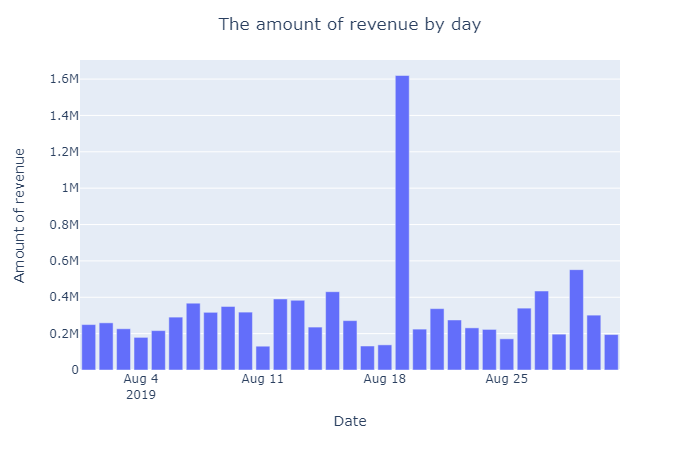

In [21]:
#Let's look at the distribution of revenue by day
df_temp = orders.groupby('date', as_index=False)['revenue'].sum()
fig = px.bar(df_temp, x='date', y='revenue')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Amount of revenue')
fig.update_layout(title='The amount of revenue by day', title_x=0.5)
fig.show(renderer="png", width=700, height=450, scale=None)

There is a dependence of revenue on the day of the week. On weekends, especially on Sundays, revenue is sharply reduced. The correlation of the number of transactions and revenue by day is visible. On August 19, there were large outliers or outliers.

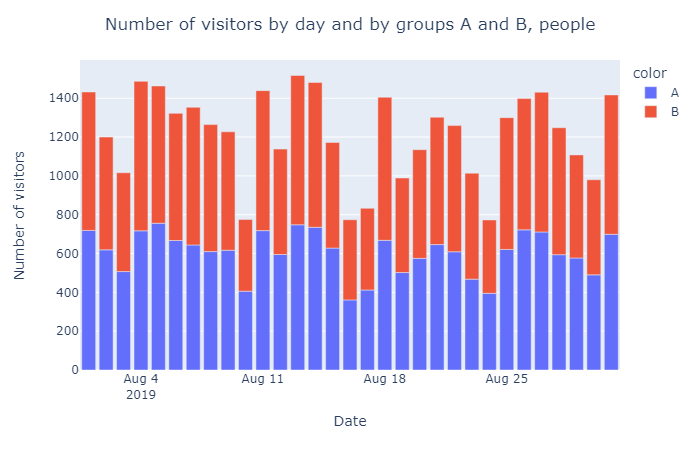

In [22]:
#Let's look at the distribution of the number of visitors by day and by groups.
fig=px.bar(x=visitors['date'], y=visitors['visitors'], color=visitors['group'])
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of visitors')
fig.update_layout(title_text='Number of visitors by day and by groups A and B, people', title_x=0.5)
fig.show(renderer="png", width=700, height=450, scale=None)

There is a dependence of the number of visitors on the day of the week. On Saturdays, there is a significant decrease in traffic.  The attendance on weekdays is much more. It should be noted that on Sunday, when the lowest revenue, the number of visitors is relatively large. Perhaps this is due to the receipt of payments (the next day).

### Plot cumulative revenue by group. Make conclusions and assumptions.

In [23]:
#create an array of unique pairs - date and group
datesGroups = orders[['date','group']].drop_duplicates()

In [24]:
# # let's calculate the cumulative number of orders by day
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1
    ).sort_values(by=['date','group'])

In [25]:
# # let's calculate the cumulative number of visitors by day
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date':'max', 'group': 'max', 'visitors':'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
# # let's combine the cumulative data into one table by date and group
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
##let's check if the start and end dates in the cumulative Data and orders dataframe match. The dates match
min_date = cumulativeData['date'].min().date()
max_date = cumulativeData['date'].max().date()
print(f"Start date of the study {min_date}, end date of the study: {max_date}. Total duration of the test: {(max_date - min_date).days + 1} day")

Start date of the study 2019-08-01, end date of the study: 2019-08-31. Total duration of the test: 31 day


In [28]:
# creating a dataframe with cumulative number of orders and revenue by day for group A
cumulativeRevenueA = cumulativeData.query('group == "A"')[['date','revenue', 'orders']]

In [29]:
# # creating a dataframe with cumulative number of orders and revenue by day for group B
cumulativeRevenueB = cumulativeData.query('group == "B"')[['date','revenue', 'orders']]

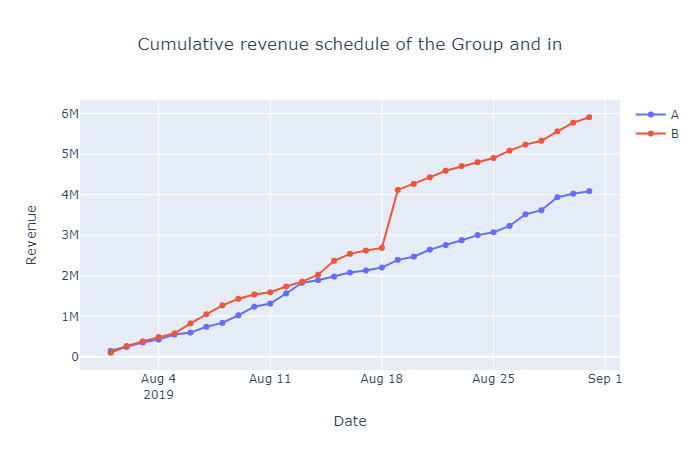

In [30]:
##Creating a cumulative revenue chart for Group A and B
fig = go.Figure()
fig.add_trace(go.Scatter(x=cumulativeRevenueA['date'], y=cumulativeRevenueA['revenue'],mode='lines+markers',name='A'))
fig.add_trace(go.Scatter(x=cumulativeRevenueB['date'], y=cumulativeRevenueB['revenue'],mode='lines+markers',name='B'))
fig.update_layout(title='Cumulative revenue schedule of the Group and in', title_x=0.5)
fig.update_xaxes(title= 'Date')
fig.update_yaxes(title='Revenue')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** Cumulative revenue for group B from August 5 until the end of the test exceeded cumulative revenue for group A. This is influenced by two factors: the number of orders or the conversion of visitors to orders and the average receipt. let's look at them in more detail below. We also see a sharp jump in revenue around August 19 (this is the same outlier). We will remove them at the stage of testing statistical hypotheses.

### Plot the cumulative average check by groups. Make conclusions and assumptions.

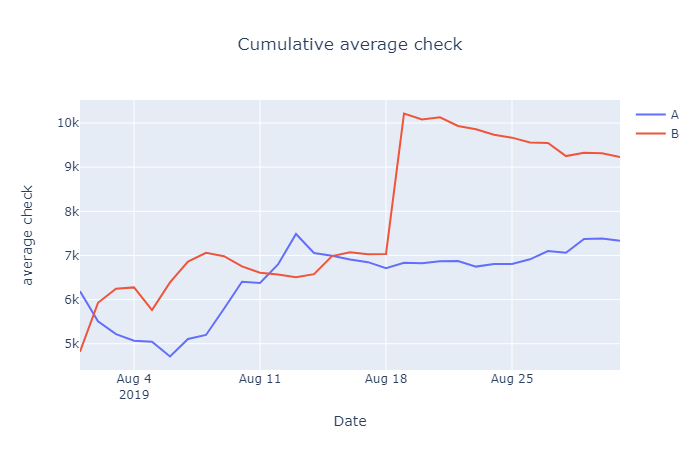

In [31]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=cumulativeRevenueA['date'], y=(cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']), name='A'))
fig.add_trace(go.Scatter(x=cumulativeRevenueB['date'], y=(cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']), name='B'))
fig.update_layout(title='Cumulative average check', title_x=0.5)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='average check')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** The average check by category is growing. Multidirectional changes are noticeable today (August 6, 13). But in general, the trend direction for both groups is the same, except for the release on August 19.

### Plot the relative change in the cumulative average check of group B to group A. Make conclusions and assumptions.

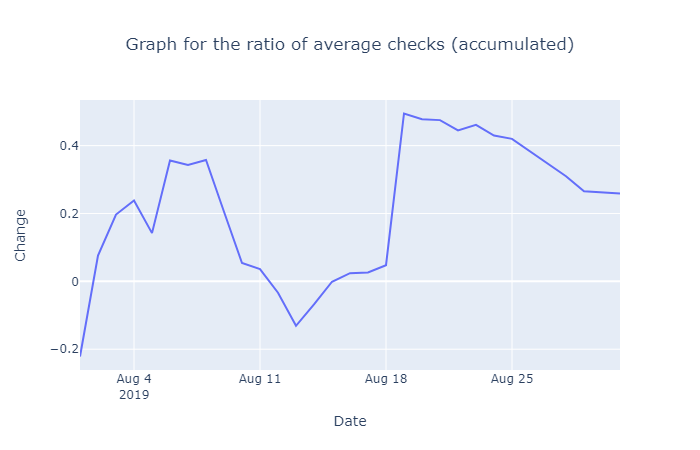

In [32]:
# # let's collect the accumulated data for two groups in one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# making a graph for the ratio of average checks (accumulated)
fig=go.Figure()
fig.add_trace(go.Scatter(x=mergedCumulativeRevenue['date'], y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
    )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1))
fig.update_layout(title='Graph for the ratio of average checks (accumulated)', title_x=0.5)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Change')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** The graph shows that at the beginning of the test, in particular on August 6 and 13, there were quite sharp differences in the average checks, however, in the absence of an outlier on August 19, there is a tendency to stabilize around 0.

### Plot the cumulative average number of orders per visitor by groups. Make conclusions and assumptions.

In [33]:
# counting cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# separating the data by group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# separating the data by group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

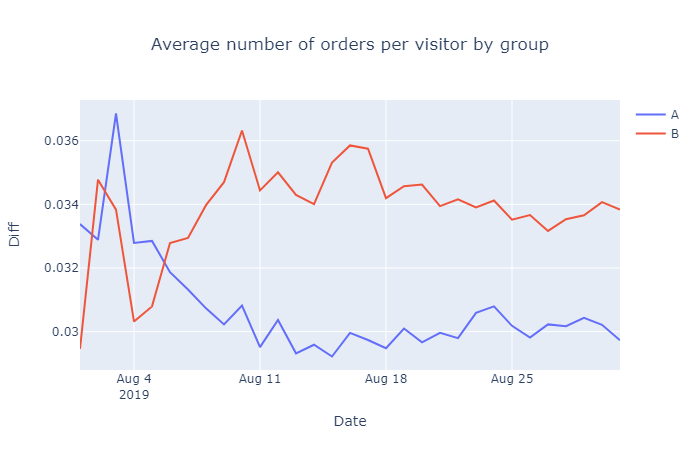

In [34]:
# making a graph for conversions (accumulated)
fig=go.Figure()
fig.add_trace(go.Scatter(x=cumulativeDataA['date'], y=cumulativeDataA['conversion'], name='A'))
fig.add_trace(go.Scatter(x=cumulativeDataB['date'], y=cumulativeDataB['conversion'], name = 'B'))
fig.update_layout(title='Average number of orders per visitor by group', title_x=0.5)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Diff')
fig.show(renderer="png", width=700, height=450, scale=None)

****Conclusion:** The conversion of visitors to orders at the beginning of the test jumps sharply, but since August 7 we have clearly seen the difference in conversions by groups. In group B, the conversion rate is higher, respectively, they order more often.

### Plot the relative change in the cumulative average number of orders per visitor of Group B to group A. Make conclusions and assumptions.

In [35]:
#let's prepare data for a graph of the relative change in the cumulative average number of orders per visitor of group B to group A.
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

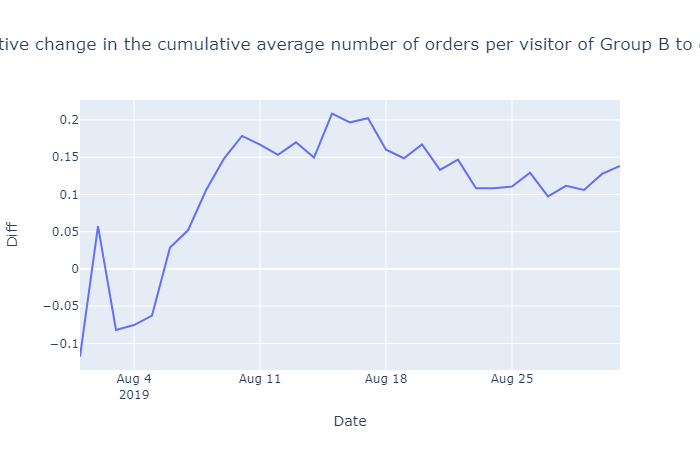

In [36]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=mergedCumulativeConversions['date'], y=mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, name='A'))
fig.update_layout(title='The relative change in the cumulative average number of orders per visitor of Group B to group A.', title_x=0.5)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Diff')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** Comparison of visitors' conversions to orders clearly shows its excess in group B. Before August 10, there was a sharp jump in the third and then the indicator stabilized at 0.15

### Build a dot graph of the number of orders by users. Make conclusions and assumptions.

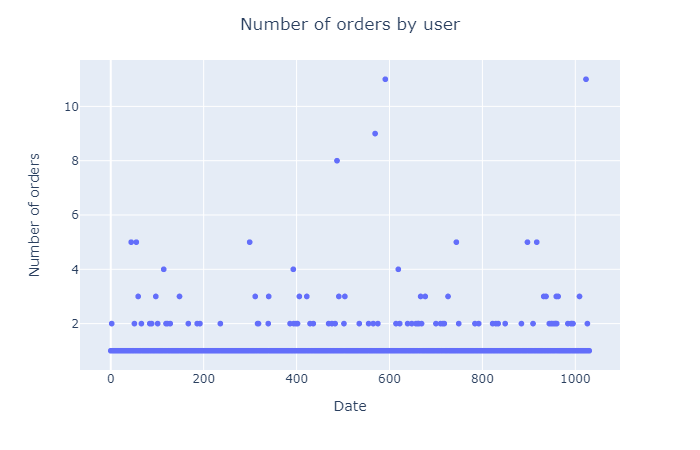

In [37]:
#plotting the number of orders by users
x= pd.Series(range(0,len(orders.groupby('visitorId', as_index = False)['transactionId'].count()['transactionId'])))
y=orders.groupby('visitorId', as_index = False)['transactionId'].count()['transactionId']
fig=px.scatter(x=x, y=y)
fig.update_layout(title='Number of orders by user', title_x=0.5)
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Number of orders')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** visitors very rarely order more than 3 times. Let's check it on percentiles.

### Count the 95th and 99th percentiles of the number of orders per user. Select a border to identify abnormal users.

In [38]:
np.percentile(y, [90,95,99])

array([1., 2., 4.])

**Output:** Let's make a border - no more than 4 orders

### Build a dot graph of the cost of orders. Make conclusions and assumptions.

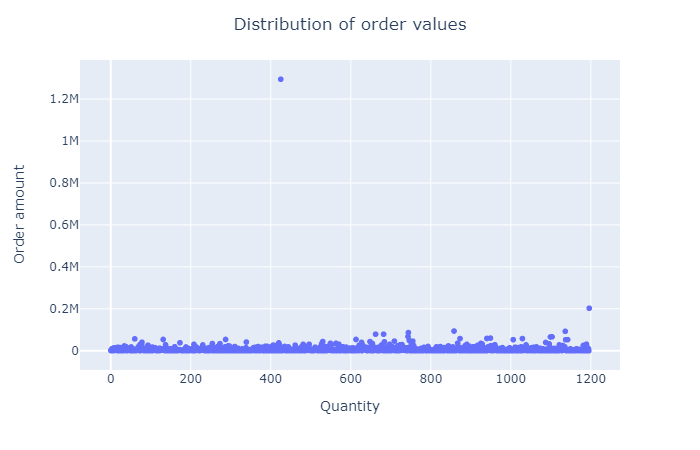

In [39]:
#plotting the distribution of order costs
x= pd.Series(range(0,len(orders['revenue'])))
fig=px.scatter(x=x, y=orders['revenue'])
fig.update_layout(title='Distribution of order values', title_x=0.5)
fig.update_xaxes(title='Quantity')
fig.update_yaxes(title='Order amount')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** Revenue has a tight, even distribution. Outliers are visible on the raw data.

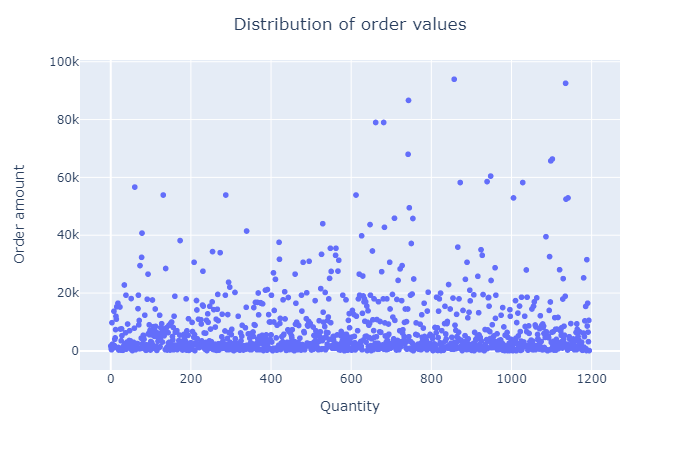

In [40]:
#plotting the distribution of the cost of orders closer
x= pd.Series(range(0,len(orders['revenue'][orders['revenue']<100000])))
fig=px.scatter(x=x, y=orders['revenue'][orders['revenue']<100000])
fig.update_layout(title='Distribution of order values', title_x=0.5)
fig.update_xaxes(title='Quantity')
fig.update_yaxes(title='Order amount')
fig.show(renderer="png", width=700, height=450, scale=None)

**Output:** Revenue has a tight, even distribution. Visually, we can assume a border in the region of 60,000. Let's check on percentiles

### Calculate the 95th and 99th percentiles of the cost of orders. Select a boundary to identify abnormal orders.

In [41]:
np.percentile(orders['revenue'], [90,95,99])

array([18168. , 28000. , 58233.2])

**Output:** No more than 1 % of data over 58 thousand. I propose to specify this boundary for cutting off emissions.

### Calculate the statistical significance of differences in the average number of orders per visitor between groups based on "raw" data. Make conclusions and assumptions.

In [42]:
#dataframe of group A with dates and number of visitors
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# # cumulative dataframe of group A with dates and cumulative number of visitors
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#dataframe of group A with dates and number of visitors
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# # cumulative dataframe of group A with dates and cumulative number of visitors
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

##dataframe by day with data on the number of orders and revenue (group A)
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# # cumulative dataframe with days with accumulated number of orders and revenue (group A)
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

##dataframe by day with data on the number of orders and revenue (group B)
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# # cumulative dataframe with days with accumulated number of orders and revenue (group B)
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#let's bring everything into one dataframe
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))


In [43]:
#dataframe with customer orders (group A)
ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))
ordersByUsersA.columns = ['visitorId', 'orders']

#dataframe with customer orders (group B)
ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))
ordersByUsersB.columns = ['visitorId', 'orders']

#adding zero values where there were no orders (group A)
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
        .sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
#adding zero values where there were no orders (group B)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB']
        .sum() - len(ordersByUsersB['orders'])),name='orders')], axis=0)

# find the pvalue by the MannaVitney method
print(f'p-value: {"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])}')
# and the difference between the average order quantities
print(f'различие в редних: {"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)}')

p-value: 0.017
различие в редних: 0.138


**Output:** The null hypothesis suggests that there are no statistically significant differences between groups A and B. The alternative hypothesis is that there are differences.
the p-value was below the level of statistical significance (0.05). Accordingly, there are differences between the groups. We reject the null hypothesis: the difference is statistically significant.

### Calculate the statistical significance of differences in the average order receipt between groups based on "raw" data. Make conclusions and assumptions.

In [44]:
p_val = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
diff=orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

print(f'p-value: {"{0:.3f}".format(p_val)}')
print(f'difference in averages: {"{0:.3f}".format(diff)}')

p-value: 0.729
difference in averages: 0.259


**Output:** The null hypothesis suggests that there are no statistically significant differences between groups A and B. The alternative hypothesis is that there are differences.
The p-value turned out to be significantly higher than the level of statistical significance of 0.05. Accordingly, it cannot be argued that there is a difference between the groups, i.e. there is none. At the same time, the average value of the average check of group B exceeds the value of group A by 25%.

### Calculate the statistical significance of the differences in the average number of orders per visitor between the groups according to the "cleared" data. Make conclusions and assumptions

In [45]:
ninine = np.percentile(orders['revenue'], 99)
orders_count = np.percentile(orders.groupby('visitorId', as_index = False)['transactionId'].count()['transactionId'], 99)

#for the purity of the analysis, we will remove those clients who fell into one and the 
#other group at the hypothesis testing stage There were 58 such clients. 
orders = orders.query('visitorId not in @to_del')

##Find outliers and count them
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_count]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_count]['visitorId']],axis=0)


usersWithExpensiveOrders = orders[orders['revenue'] > ninine]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates()
    .sort_values())

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
13


In [46]:
#Let's create similar dataframes based on the cleared data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [47]:
print(f'p-value: {"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])}')
print(f'difference in averages:{"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)}') 

p-value: 0.015
difference in averages:0.153


**Output:** The null hypothesis suggests that there are no statistically significant differences between groups A and B. The alternative hypothesis is that there are differences.  p-value was below the level of statistical significance (0.05). Accordingly, there are differences between the groups. We reject the null hypothesis: the difference is statistically significant. the difference in averages decreased from 25 to 15 %

### Calculate the statistical significance of the differences in the average order receipt between the groups based on the "cleared" data. Make conclusions and assumptions.

In [48]:
print('P-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Difference in averages:')
print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
        .mean() - 1))

P-value:
0.901
Difference in averages:
-0.032


**Output:** The null hypothesis suggests that there are no statistically significant differences between groups A and B. The alternative hypothesis is that there are differences.  The p-value turned out to be much higher than the statistical significance level (0.05). Accordingly, there are no differences between the groups. There is no reason to reject the null hypothesis. The difference in averages was 3 %

### Make a decision based on the test results and explain it.

**Output** 
- - Data used in the work: information on visitors by day, information on orders (date, revenue, order ID and customer ID). 
- - Data processing was carried out and anomalies in revenue were identified and eliminated according to the 99% percentile methodology.
- More than 50 clients were identified who were included in one and another group. For the purity of the analysis, their indicators were not taken into account
- - Based on the results of statistical tests comparing two groups of users, group B showed statistically significant results on the average number of orders for visitors according to the cleared data, while the statistical significance of the differences in the average receipt far exceeded 0.05, which indicates that it is reasonable to assume that there are no differences in the average receipt of the groups.
- - I propose to complete the test, since the test took into account fluctuations depending on the day of the week and the relative indicators of the groups stabilized.